## Puzzle Overview:
* 100 prisoners numbered 1-100
* Slips with their numbers are randomly places in 100 boxes in a room
* Each prisoner may enter the room one at a time and check 50 boxes
* They must leave the room exactly as they found it and can't communicate with the others after
* If all 100 prisoners find their number during their turn in the room, they will all be free. But if even one fails, they will be executed.   
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
num = 100
boxes_to_open = 50
prisoners = np.zeros(num) # records which prisoner found his slip (1) and which didn't (0)

In [3]:
# Creating 100 boxes each with a random slip inside
def box_assignment_secret(num):
    boxes = np.array(random.sample(range(num), num))
    return boxes

In [4]:
# Test run
boxes = box_assignment_secret(num)
boxes.min(), boxes.max(), boxes[:5]

(0, 99, array([36, 73, 49,  0, 10]))

In [5]:
def strategy_random(prisoners, boxes, boxes_to_open=50):
    n = len(prisoners)
    
    for px in range(n):
        boxes_selected = np.array(random.sample(range(n), boxes_to_open))
        slips_seen = boxes[boxes_selected]
        
        # If one of the slips matches prisoner's index, then True/1 else False/0
        prisoners[px] = int((slips_seen == px).any())
    
    return prisoners, prisoners.sum()

In [6]:
# Test run
result_per_prisoner, total_success = strategy_random(prisoners, boxes, boxes_to_open)
total_success

49.0

In [7]:
def strategy_sequential(prisoners, boxes, boxes_to_open=50):
    n = len(prisoners)
    boxes_selected = np.zeros((n,boxes_to_open))+(-1)  # to avoid 0
    slips_seen = np.zeros((n,boxes_to_open))
        
    for px in range(n):                
        
        # Start by opening the Box number same as prisoner number
        box_to_open = px #random.sample(range(n), 1)[0]
        
        for bx in range(boxes_to_open):
            
            # print('Prisoner #:',px, ' selection number:',bx, 'box number:', box_to_open)
            
            # if the next box_to_open has already been opened before, loop end. 
            # Pick next one to start another loop.
            while (box_to_open==boxes_selected[px,:]).any():
                box_to_open = (box_to_open+1) % num
                
                # if bx==boxes_to_open-1: # edge case - when boxes to be selected is same as number of boxes
                #    break                # then any number will repeat becaues all boxes have been selected.
                 
            slip_num = boxes[box_to_open]
            slips_seen[px,bx] = slip_num
            
            boxes_selected[px,bx] = box_to_open
            box_to_open = slip_num
        
        # True/1 is prisoner sees his slip in the boxes opened, 0 otherwise
        prisoners[px] = int((slips_seen[px,:] == px).any())
    
    return prisoners, prisoners.sum(), boxes_selected, slips_seen

In [8]:
# Test run
result_per_prisoner, total_success, boxes_selected, slips_seen = strategy_sequential(prisoners, boxes, boxes_to_open)
total_success

100.0

In [9]:
# i = 1

In [10]:
# boxes

In [11]:
# boxes_selected[i,:]

In [12]:
# slips_seen[i,:]

In [13]:
# np.argmax((boxes_selected[i,0]==slips_seen[i,:]).astype(int))  # non-zero means, first loop was completed

## Run the experiment multiple times

### Strategy 1 - Pick 50 boxes at random vs. Strategy 2 - Pick 50 boxes in sequential order

In [14]:
sims = 10**3

In [15]:
results_1 = np.zeros(sims)
results_2 = np.zeros(sims)

for i in range(sims):
    boxes = box_assignment_secret(num)
    
    # Results using strategy 1
    _, results_1[i] = strategy_random(prisoners, boxes, boxes_to_open)
    
    # Results using strategy 2
    _, results_2[i], _, _ = strategy_sequential(prisoners, boxes, boxes_to_open)    

Strategy 1: number of times all prisoners got their number:  0.0


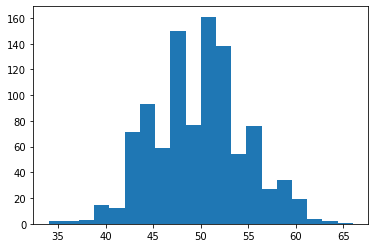

In [16]:
print('Strategy 1: number of times all prisoners got their number: ', (results_1 == num).mean())
plt.hist(results_1, bins=20);

Strategy 2: number of times all prisoners got their number:  0.311


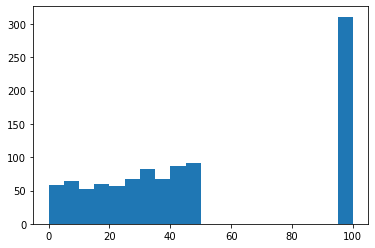

In [17]:
print('Strategy 2: number of times all prisoners got their number: ', (results_2 == num).mean())
plt.hist(results_2, bins=20);